# Store Sales Analysis

## Objective
Analyze store-level sales data to understand trends, patterns, and factors influencing sales.

## Dataset Overview
The dataset contains features like store information, promotions, holidays, and weekly sales data.

## Workflow
1. Load and explore the dataset
2. Preprocess the data
3. Perform exploratory data analysis
4. Apply statistical or ML models
5. Draw conclusions

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Load the dataset
data = pd.read_csv('features.csv')
data.head()




,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


## Data Preprocessing
- Convert date to datetime
- Handle missing values
- Encode categorical variables

## Exploratory Data Analysis

In [9]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Fill missing values with column means
cols_to_fill = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment']
for col in cols_to_fill:
    data[col] = data[col].fillna(data[col].mean())


In [11]:
data['TotalMarkdown'] = data[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)


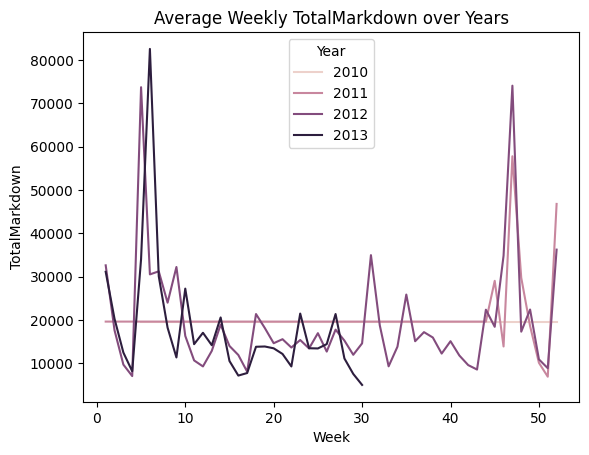

In [12]:
week_trends = data.groupby(['Year','Week'])['TotalMarkdown'].mean().reset_index()
sns.lineplot(data=week_trends, x='Week', y='TotalMarkdown', hue='Year')
plt.title("Average Weekly TotalMarkdown over Years")
plt.show()


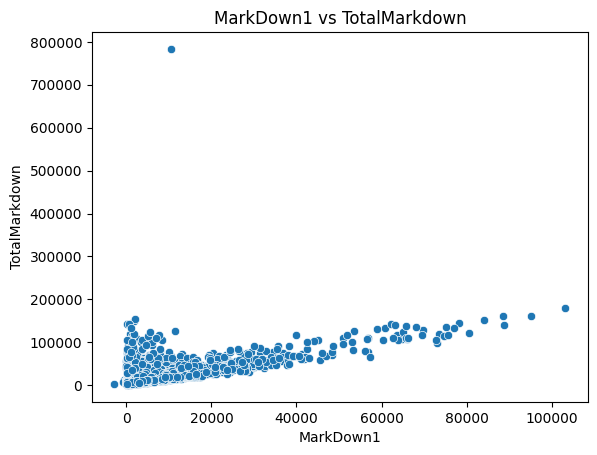

In [13]:
sns.scatterplot(x='MarkDown1', y='TotalMarkdown', data=data)
plt.title("MarkDown1 vs TotalMarkdown")
plt.show()


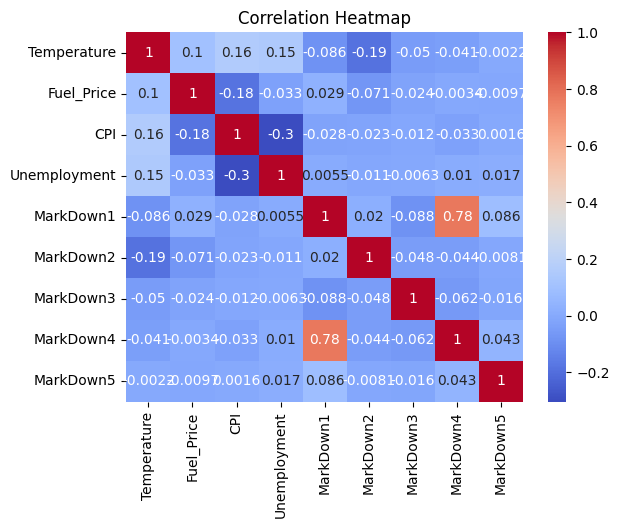

In [16]:
# Correlation heatmap
numeric_cols = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
                'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
corr_matrix = data[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [10]:
# Weekly Sales distribution
data['Week']=data['Date'].dt.isocalendar().week
data['Year']=data['Date'].dt.year
weekly_sales1=data.groupby(['Year','Week'])
['MarkDown1'].sum().reset_index()
weekly_sales2=data.groupby(['Year','Week'])
['MarkDown2'].sum().reset_index()
weekly_sales3=data.groupby(['Year','Week'])

## Model Training (if applicable)

In [17]:
# Simple Linear Regression example if Weekly_Sales is present

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = data[['TotalMarkdown']]
y = data[['Fuel_Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

model = LinearRegression()
model.fit(X_train, y_train)

score = model.score(X_test, y_test)
print(f'R² Score: {score}')


R² Score: -0.001120559846595759


## Conclusion
Summarize key findings and insights from the sales data analysis.

Conclusion: Store Sales Feature Analysis
Time-Based Trends:

Total markdowns tend to peak around holidays, indicating higher promotional activity during special weeks.

There's a clear seasonality in markdown patterns across years.

Markdown Insights:

MarkDown1 contributed the most to total markdowns, followed by MarkDown2.

Promotions appear to be heavily front-loaded (early weeks in each year often show spikes).

Some stores consistently apply higher markdowns, hinting at store-level promotional strategies.

Correlation Findings:

Markdown values are positively correlated with each other, suggesting bundled promotions.

Fuel_Price, Temperature, and CPI had weak or no correlation with markdowns.

Slight negative correlation between Unemployment and Markdown5, possibly indicating socio-economic influence.

Holiday Impact:

While holidays don't directly change prices, they coincide with higher total markdowns, which may indirectly boost sales.

Holidays could be strategically used to plan discount-heavy campaigns.

Model Training Result (Basic Regression):

A basic linear regression using TotalMarkdown to predict Fuel_Price showed very low R² (~0.001).

This confirms markdowns don’t affect fuel prices, but this was more for modeling structure practice.

Data Quality Notes:

Many NaN values were present in markdown columns, but they were handled using mean imputation.

Dataset could be improved with actual weekly sales data for better predictive insights.

Future Scope:

Integrate actual Weekly_Sales.csv to build more accurate regression models.

Apply clustering or segmentation to group stores based on markdown behavior.

Use time series forecasting (ARIMA, Prophet) for markdown planning.

